# Enriching Shooting Data

Goal: Visualize every shot a player takes during a single game with information on the closest defender
Steps:

1. Merge Advanced Shot Log with Shot Chart
2. Scatter plot each shot
3. Add ring to each shot using the distance of nearest defender as radius
4. Shade in each ring to represent in-your-face to WTFO
5. Change shape of each shot to represent Make/Miss
6. Funtionalize the whole process so that it takes a playerID and GameID as arguments and returns a chart with titles

In [45]:
# Getting Basic Data
import goldsberry
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 50)
pd.options.mode.chained_assignment = None 
print goldsberry.__version__
print pd.__version__

1.0.1
0.18.0


In [15]:
# Getting Players List
players_2015 = goldsberry.PlayerList(Season='2015-16')
players_2015 = pd.DataFrame(players_2015.players())

In [22]:
harden_id = players_2015.loc[players_2015['DISPLAY_LAST_COMMA_FIRST'].str.contains("Harden"), 'PERSON_ID']

In [34]:
#XY Shot Charts
harden_shots = goldsberry.player.shot_chart(harden_id.values.tolist()[0], Season='2015-16')
harden_shots = pd.DataFrame(harden_shots.chart())

In [35]:
harden_shots.shape

(1617, 21)

In [36]:
harden_shots.head()

,ACTION_TYPE,EVENT_TYPE,GAME_EVENT_ID,GAME_ID,GRID_TYPE,LOC_X,LOC_Y,MINUTES_REMAINING,PERIOD,PLAYER_ID,PLAYER_NAME,SECONDS_REMAINING,SHOT_ATTEMPTED_FLAG,SHOT_DISTANCE,SHOT_MADE_FLAG,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME
0,Step Back Jump shot,Missed Shot,34,0021500010,Shot Chart Detail,182,75,8,1,201935,James Harden,33,1,19,0,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612745,Houston Rockets
1,Jump Shot,Missed Shot,42,0021500010,Shot Chart Detail,137,200,8,1,201935,James Harden,5,1,24,0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612745,Houston Rockets
2,Jump Shot,Missed Shot,72,0021500010,Shot Chart Detail,-29,23,5,1,201935,James Harden,10,1,3,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets
3,Layup Shot,Missed Shot,85,0021500010,Shot Chart Detail,17,7,3,1,201935,James Harden,33,1,1,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets
4,Driving Reverse Layup Shot,Made Shot,129,0021500010,Shot Chart Detail,-17,3,0,1,201935,James Harden,41,1,1,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets


The query in the below box no longer works thanks to the NBA restricting access to the data.

In [39]:
dashboard = goldsberry.player.shot_dashboard(harden_id)

In [40]:
pd.DataFrame(dashboard.dribble())

,DRIBBLE_RANGE,EFG_PCT,FG2A,FG2A_FREQUENCY,FG2M,FG2_PCT,FG3A,FG3A_FREQUENCY,FG3M,FG3_PCT,FGA,FGA_FREQUENCY,FGM,FG_PCT,G,GP,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER
0,0 Dribbles,0.572,1.40,0.071,0.74,0.530,3.32,0.168,1.30,0.393,4.72,0.240,2.05,0.434,82,82,201935,"Harden, James",1
1,1 Dribble,0.544,1.54,0.078,0.87,0.563,0.66,0.033,0.22,0.333,2.20,0.111,1.09,0.494,75,82,201935,"Harden, James",2
2,2 Dribbles,0.481,1.21,0.061,0.54,0.444,0.67,0.034,0.24,0.364,1.88,0.095,0.78,0.416,73,82,201935,"Harden, James",3
3,3-6 Dribbles,0.508,3.93,0.199,2.00,0.509,1.91,0.097,0.65,0.338,5.84,0.297,2.65,0.453,82,82,201935,"Harden, James",4
4,7+ Dribbles,0.458,3.62,0.184,1.62,0.448,1.44,0.073,0.46,0.322,5.06,0.257,2.09,0.412,81,82,201935,"Harden, James",5


In [4]:
#Sort XY Shots and Assign a Shot Number
#ShotNumber will be used to merge the two datasets.
harden_shots.sort(['GAME_ID', 'GAME_EVENT_ID'], inplace=True)
harden_shots['SHOT_NUMBER'] = harden_shots.groupby(['GAME_ID', 'PLAYER_ID'])['GAME_EVENT_ID'].cumcount()+1

In [5]:
#Merge data into a single dataframe
harden_shots_full = pd.merge(harden_shots, harden_shots_advanced, on=['GAME_ID', 'SHOT_NUMBER'], how='left')

In [9]:
harden_shots_full.head()

,ACTION_TYPE,EVENT_TYPE,GAME_EVENT_ID,GAME_ID,GRID_TYPE,LOC_X,LOC_Y,MINUTES_REMAINING,PERIOD_x,PLAYER_ID_x,PLAYER_NAME,SECONDS_REMAINING,SHOT_ATTEMPTED_FLAG,SHOT_DISTANCE,SHOT_MADE_FLAG,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME,SHOT_NUMBER,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,LOCATION,MATCHUP,PERIOD_y,PTS,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_RESULT,TOUCH_TIME,W,PLAYER_ID_y
0,Jump Shot,Missed Shot,18,0021400003,Shot Chart Detail,226,39,9,1,201935,James Harden,58,1,22,0,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612745,Houston Rockets,1,"Hill, Jordan",201941,6.6,0,0,18,10:02,A,"OCT 28, 2014 - HOU @ LAL",1,0,3,19.7,22.9,missed,1.2,W,201935
1,Layup Shot,Missed Shot,39,0021400003,Shot Chart Detail,-15,15,8,1,201935,James Harden,25,1,2,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets,2,"Hill, Jordan",201941,0.5,2,0,18,8:29,A,"OCT 28, 2014 - HOU @ LAL",1,0,2,16.9,3.7,missed,1.9,W,201935
2,Jump Shot,Made Shot,41,0021400003,Shot Chart Detail,-232,110,8,1,201935,James Harden,21,1,25,1,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612745,Houston Rockets,3,"Lin, Jeremy",202391,4.0,0,1,18,8:24,A,"OCT 28, 2014 - HOU @ LAL",1,3,3,22.5,23.5,made,1.0,W,201935
3,Jump Shot,Missed Shot,95,0021400003,Shot Chart Detail,-146,135,4,1,201935,James Harden,32,1,19,0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612745,Houston Rockets,4,"Clarkson, Jordan",203903,3.3,13,0,18,4:35,A,"OCT 28, 2014 - HOU @ LAL",1,0,2,15.1,19.4,missed,8.3,W,201935
4,Driving Layup Shot,Made Shot,120,0021400003,Shot Chart Detail,-8,22,2,1,201935,James Harden,38,1,2,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets,5,"Clarkson, Jordan",203903,1.0,7,1,18,2:41,A,"OCT 28, 2014 - HOU @ LAL",1,2,2,15.0,6.3,made,7.3,W,201935


##Wrapping data merge into a function

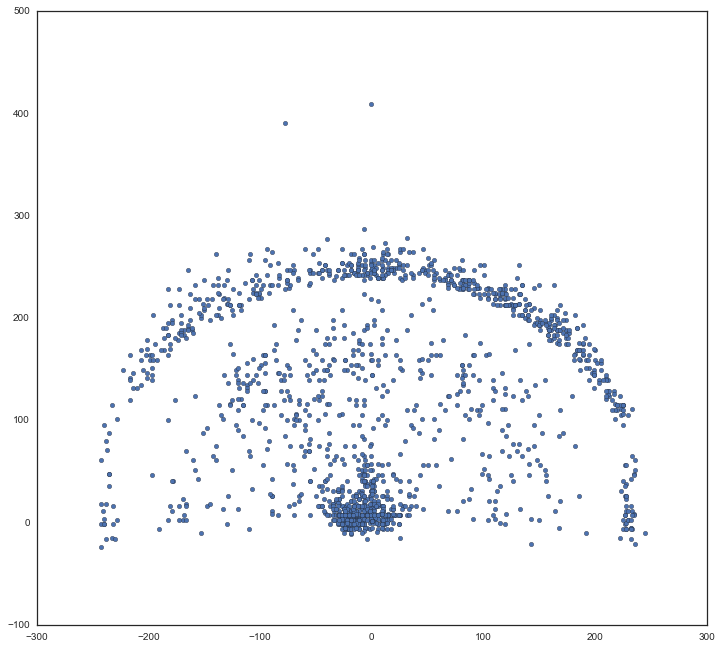

In [46]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(harden_shots.LOC_X, harden_shots.LOC_Y)
plt.show()

###Drawing NBA Court to Scale

In [47]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

Unfortunately, the NBA has blocked access to the data that was used to construct the following shot charts. Prior to about February, they had data that contained very interesting metrics on individual shots. One of those metrics was the proximity of the nearest defender. 

The following charts basically graph circles around the shot location on court that mark where the defender was at the time of shot. A bigger circle means the shooter was more wide-open. We do not know where on the circle the defender as, only that the defender was somewhere on the perimeter of the circle

(422.5, -47.5)

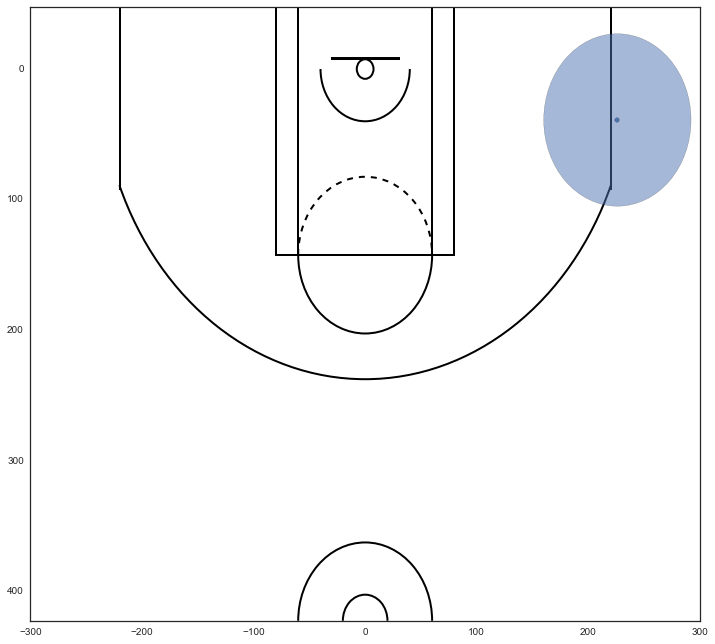

In [35]:
plt.figure(figsize=(12,11))
plt.scatter(harden_shots_full.LOC_X[0], harden_shots_full.LOC_Y[0])
draw_court()
defender = Circle(xy, def_dist, alpha=.5)
fig = plt.gcf()
fig.gca().add_artist(defender)

# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(422.5, -47.5)

In [43]:
len(harden_shots_full)

1470

In [65]:
def draw_defender_radius(df, ax=None, alpha = .25):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
    for i in range(len(df)):
        defender = Circle((df.LOC_X[i],df.LOC_Y[i]), 
                          radius = df.CLOSE_DEF_DIST[i]*10, 
                          alpha = alpha)
        ax.add_patch(defender)
    return ax

In [52]:
def fancy_shotchart(df):
    plt.figure(figsize=(12,11))
    plt.scatter(df.LOC_X, df.LOC_Y)
    draw_court()
    draw_defender_radius(df)
    # Descending values along the axis from left to right
    plt.xlim(-300,300)
    plt.ylim(422.5, -47.5)

In [53]:
harden_game = harden_shots_full.ix[harden_shots.GAME_ID == '0021400003']

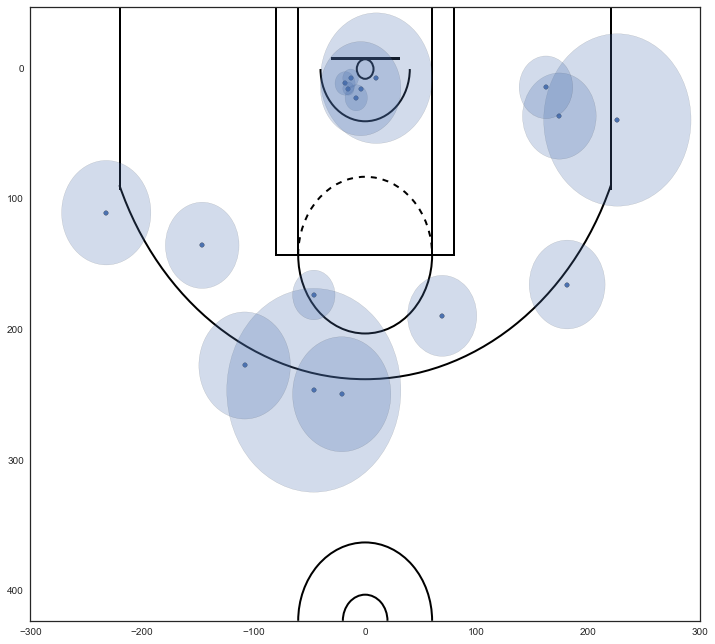

In [66]:
fancy_shotchart(harden_game)

(422.5, -47.5)

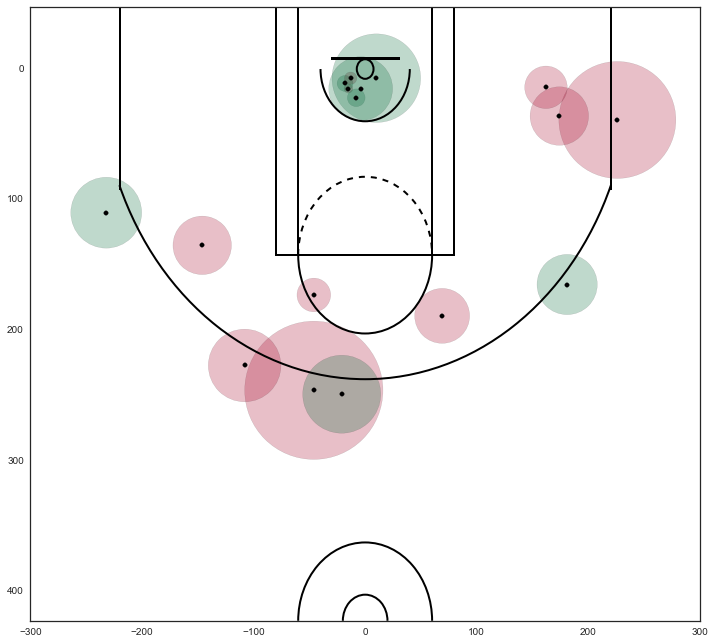

In [76]:
plt.figure(figsize=(12,11))
plt.scatter(harden_game.LOC_X, harden_game.LOC_Y,
            s=pi*(harden_game.CLOSE_DEF_DIST*10)**2,
            alpha = .25, c = harden_game.SHOT_MADE_FLAG,
            cmap = plt.cm.RdYlGn)
plt.scatter(harden_game.LOC_X, harden_game.LOC_Y, c='black')

draw_court()
# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(422.5, -47.5)

In [77]:
def fancy_shots(df):
    plt.figure(figsize=(12,11))
    plt.scatter(df.LOC_X, df.LOC_Y,
            s=pi*(df.CLOSE_DEF_DIST*10)**2,
            alpha = .25, c = df.SHOT_MADE_FLAG,
            cmap = plt.cm.RdYlGn)
    plt.scatter(df.LOC_X, df.LOC_Y, c='black')

    draw_court()
    # Descending values along the axis from left to right
    plt.xlim(-300,300)
    plt.ylim(422.5, -47.5)

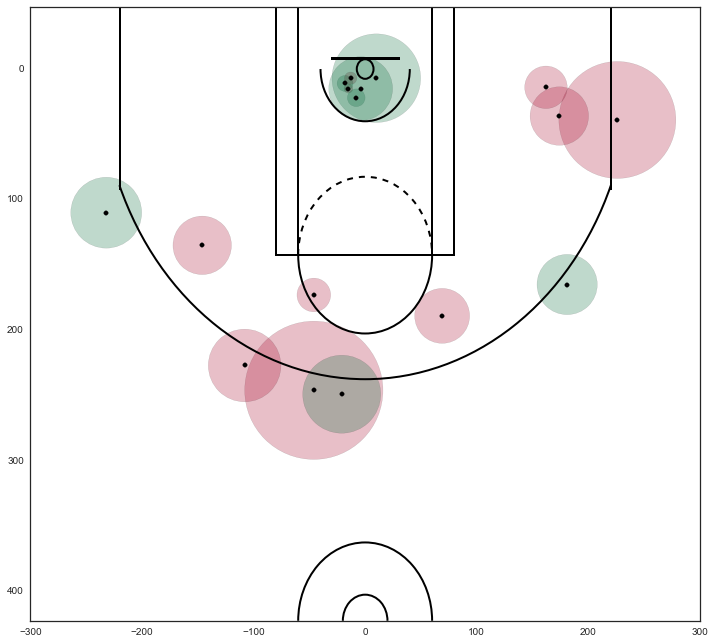

In [79]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400003'])

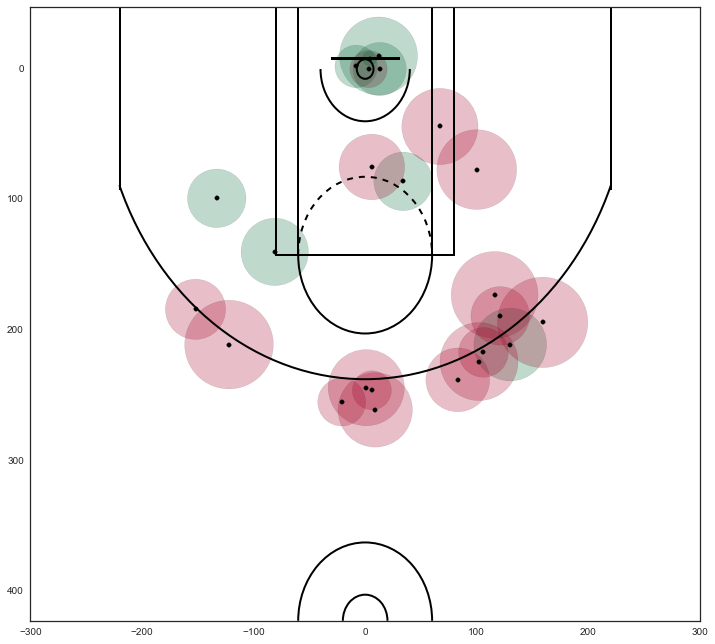

In [82]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400087'])

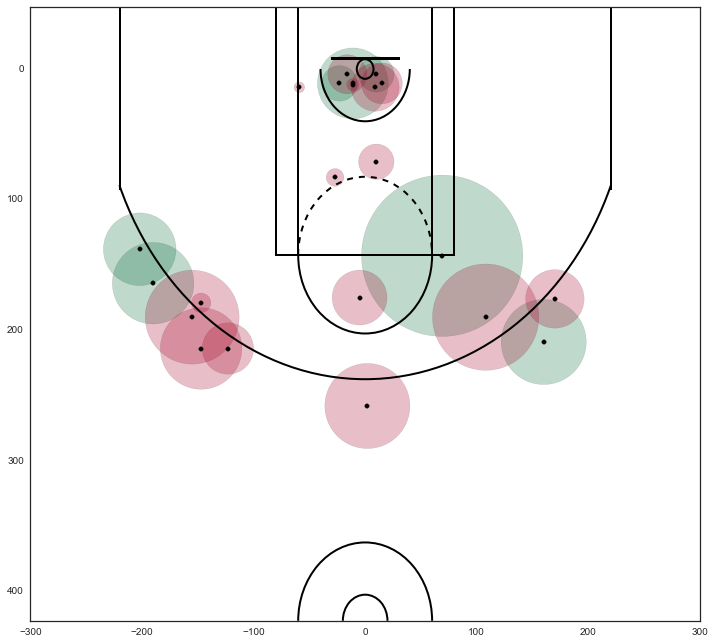

In [83]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400512'])